## EDA


### Data importing
Our first step here: import the dataset and have a little check, its shape, columns and first few columns, all good

In [ ]:
# pip install pandas
# pip install matplotlib
# pip install numpy
# pip install scipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('ggplot')
from operator import itemgetter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import gaussian_kde

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ni_accidents = pd.read_csv('ni_accidents_2021_wgoogle.csv',index_col=0,low_memory=False)
# updated_lats_longs = pd.read_csv("updated_lat_longs.csv", index_col = 0)
updated_lats_longs = pd.read_csv('/content/drive/MyDrive/Internship/updated_lat_longs.csv', index_col = 0)
ni_accidents = pd.read_csv('/content/drive/MyDrive/Internship/ni_accidents_2021_wgoogle.csv',index_col=0,low_memory=False)

In [ ]:
ni_accidents.head()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_move,c_school,c_pcv,c_pedinj,c_vtype,lat,lon,address,postcodes,location_infos
0,2016,1,"Newry, Mourne, Down",Slight injury collision,1,1,FRI,1,1,1,...,NaN,Other,NaN,NaN,Car,54.379157,-5.685504,"87 Killyleagh Rd, Downpatrick BT30 9UD, UK",BT30 9UD,"['street_address', 'establishment', 'point_of_..."
1,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,NaN,NaN,NaN,NaN,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr..."
2,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,NaN,NaN,NaN,NaN,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr..."
3,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,Other,NaN,NaN,Car,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr..."
4,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,Other,NaN,NaN,Car,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr..."


In [ ]:
ni_accidents.shape

(71964, 56)

In [ ]:
ni_accidents.columns

Index(['a_year', 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday',
       'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype',
       'a_speed', 'a_jdet', 'a_jcont', 'a_pedhum', 'a_pedphys', 'a_light',
       'a_weat', 'a_roadsc', 'a_speccs', 'a_chaz', 'a_scene', 'v_id', 'v_type',
       'v_tow', 'v_man', 'v_loc', 'v_junc', 'v_skid', 'v_hit', 'v_leave',
       'v_hitoff', 'v_impact', 'v_sex', 'v_agegroup', 'v_hitr', 'v_forreg',
       'c_id', 'c_class', 'c_sex', 'c_agegroup', 'c_sever', 'c_loc', 'c_move',
       'c_school', 'c_pcv', 'c_pedinj', 'c_vtype', 'lat', 'lon', 'address',
       'postcodes', 'location_infos'],
      dtype='object')

In [ ]:
updated_lats_longs.head()

,lats,longs,address,postcodes,location_infos
1,54.323726,-7.600196,"Old Enniskillen Rd, Enniskillen BT74 4QU, UK",BT74 4QU,"['route', 'route', 'street_address', 'postal_c..."
11,54.325467,-7.610769,"605 Belfast Rd, Enniskillen BT74 4HN, UK",BT74 4HN,"['route', 'route', 'street_address', 'establis..."
15,54.398424,-5.537080,"3 A20, Newtownards BT22 1PW, UK",BT22 1PW,"['route', 'route', 'street_address', 'premise']"
16,54.677334,-7.444637,"Cloonty Rd, Omagh BT78 4FB, UK",BT78 4FB,"['route', 'route', 'premise', 'postal_code']"
18,54.589050,-5.957753,"Westlink, Belfast BT12 6HD, UK",BT12 6HD,"['route', 'route', 'postal_code', 'postal_code..."


In [ ]:
updated_ni_accidents = pd.merge(ni_accidents, updated_lats_longs, how = "left",left_on=['lat','lon'], right_on = ['lats','longs'])


In [ ]:
updated_ni_accidents[["address_x", "postcodes_x","location_infos_x"]] = np.where(updated_ni_accidents[["address_y", "postcodes_y","location_infos_y"]].isna(), updated_ni_accidents[["address_x", "postcodes_x","location_infos_x"]], updated_ni_accidents[["address_y","postcodes_y","location_infos_y"]])

In [ ]:
updated_ni_accidents.drop(updated_ni_accidents.iloc[:, -5:], inplace = True, axis = 1)


In [ ]:
updated_ni_accidents = updated_ni_accidents.rename(columns={"address_x": "address", "postcodes_x": "postcodes","location_infos_x":"location_infos"})

### Data Cleaning

- remove duplicate rows: we noticed that some of the rows contains the same information, so drop the duplicated rows

- remove nearly blanked columns: we noticed that some of the columns have nearly 70-80% of NAN or blanks, we decided to drop these columns from the df for later steps. Columns are selected by the percentage of nulls in each column, the column will be dropped if the percentage is over 50%.

- change wired values in column to unknown,eg: 4 in v_sex, and then fill the nan to Unknown

In [ ]:
ni_accidents_removed = updated_ni_accidents.drop_duplicates()

In [ ]:
ni_accidents_removed.shape
# duplicates rows removed successfully

(71647, 56)

In [ ]:
nans = pd.DataFrame()
nans["num"] = ni_accidents_removed.isnull().sum()

In [ ]:
nans["percent(%)"] = (nans["num"]/ni_accidents_removed.shape[0])*100

In [ ]:
# nans

In [ ]:
row_names = nans[nans["percent(%)"]>50].index

In [ ]:
ni_accidents_removed.drop(row_names, inplace = True, axis = 1)

<ipython-input-26-b6caa412db7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed.drop(row_names, inplace = True, axis = 1)


In [ ]:
ni_accidents_removed.shape

(71647, 36)

In [ ]:
ni_accidents_removed.columns
# nearly blanked columns are removed successfully

Index(['a_year', 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday',
       'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype',
       'a_speed', 'v_id', 'v_type', 'v_tow', 'v_man', 'v_loc', 'v_impact',
       'v_sex', 'v_agegroup', 'v_hitr', 'c_id', 'c_class', 'c_sex',
       'c_agegroup', 'c_sever', 'c_school', 'c_vtype', 'lat', 'lon', 'address',
       'postcodes', 'location_infos'],
      dtype='object')

In [ ]:
ni_accidents_removed.head()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_sex,c_agegroup,c_sever,c_school,c_vtype,lat,lon,address,postcodes,location_infos
0,2016,1,"Newry, Mourne, Down",Slight injury collision,1,1,FRI,1,1,1,...,Female,17-24,Slightly injured,Other,Car,54.379157,-5.685504,"87 Killyleagh Rd, Downpatrick BT30 9UD, UK",BT30 9UD,"['street_address', 'establishment', 'point_of_..."
1,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,NaN,NaN,NaN,NaN,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr..."
3,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,Female,35-44,Slightly injured,Other,Car,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr..."
5,2016,3,"Ards, North Down",Serious injury collision,1,1,FRI,1,1,3,...,Male,35-44,Seriously injured,Other,Car,54.476645,-5.692128,"28 Comber Rd, Killinchy, Newtownards BT23 6PB, UK",BT23 6PB,"['premise', 'street_address', 'establishment',..."
7,2016,4,Belfast City,Slight injury collision,2,2,FRI,1,1,3,...,NaN,NaN,NaN,NaN,NaN,54.593451,-5.887517,"8/367 Beersbridge Rd, Belfast BT5 5EF, UK",BT5 5EF,"['premise', 'establishment', 'health', 'point_..."


In [ ]:
ni_accidents_removed["v_sex"].unique()


array(['Female', 'Male', nan, '4', 'Unknown'], dtype=object)

In [ ]:
# change the rows whose v_sex is "4" to unknown
# ni_accidents_removed = ni_accidents_removed[ni_accidents_removed["v_sex"] != "4"]
ni_accidents_removed["v_sex"].replace("4", "Unknown", inplace = True)

<ipython-input-31-ccebba22cc44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["v_sex"].replace("4", "Unknown", inplace = True)


In [ ]:
ni_accidents_removed["v_sex"].unique()


array(['Female', 'Male', nan, 'Unknown'], dtype=object)

### Data preprossing and visualisation

We create a new column and saves the first part of postcode, for example: BT30 of BT30 9UD, each BT~ represents an area of belfast. The whole postcode is a little specific for model, and just the first part will be easier to build a model on. Some value in this column is not a postcode, eg: United Kingdom, so we only take the first 4 characters if the string starts from BT

In [ ]:
# ni_accidents_removed["postcodes_first4"] = np.where(ni_accidents_removed["postcodes"].apply(lambda x:x[:2]) == "BT", ni_accidents_removed["postcodes"].apply(lambda x:x[:4]),"Unknown")
ni_accidents_removed["postcodes_first4"] = ni_accidents_removed["postcodes"].apply(lambda x:x[:4])

<ipython-input-33-ee6b9b9b70b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["postcodes_first4"] = ni_accidents_removed["postcodes"].apply(lambda x:x[:4])


In [ ]:
ni_accidents_removed["postcodes_first4"] = np.where(ni_accidents_removed["postcodes_first4"].apply(lambda x:x[3:4]) == " ", ni_accidents_removed["postcodes_first4"].apply(lambda x:x[:3]),ni_accidents_removed["postcodes_first4"])

<ipython-input-34-791d8ad77dfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["postcodes_first4"] = np.where(ni_accidents_removed["postcodes_first4"].apply(lambda x:x[3:4]) == " ", ni_accidents_removed["postcodes_first4"].apply(lambda x:x[:3]),ni_accidents_removed["postcodes_first4"])


In [ ]:
# ni_accidents_removed["postcodes_first4"] = np.where(ni_accidents_removed["postcodes"].apply(lambda x:x[:2]) == "BT", ni_accidents_removed["postcodes"].apply(lambda x:x[:4]),"Unknown")
ni_accidents_removed["general_injury_type"] = np.where(ni_accidents_removed["a_type"].apply(lambda x:x[:6]) == "Slight", ni_accidents_removed["a_type"],"Serious and Fatal injury collision")

<ipython-input-35-98101e986849>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["general_injury_type"] = np.where(ni_accidents_removed["a_type"].apply(lambda x:x[:6]) == "Slight", ni_accidents_removed["a_type"],"Serious and Fatal injury collision")


In [ ]:
ni_accidents_removed.head()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_sever,c_school,c_vtype,lat,lon,address,postcodes,location_infos,postcodes_first4,general_injury_type
0,2016,1,"Newry, Mourne, Down",Slight injury collision,1,1,FRI,1,1,1,...,Slightly injured,Other,Car,54.379157,-5.685504,"87 Killyleagh Rd, Downpatrick BT30 9UD, UK",BT30 9UD,"['street_address', 'establishment', 'point_of_...",BT30,Slight injury collision
1,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,NaN,NaN,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr...",BT48,Slight injury collision
3,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,Slightly injured,Other,Car,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr...",BT48,Slight injury collision
5,2016,3,"Ards, North Down",Serious injury collision,1,1,FRI,1,1,3,...,Seriously injured,Other,Car,54.476645,-5.692128,"28 Comber Rd, Killinchy, Newtownards BT23 6PB, UK",BT23 6PB,"['premise', 'street_address', 'establishment',...",BT23,Serious and Fatal injury collision
7,2016,4,Belfast City,Slight injury collision,2,2,FRI,1,1,3,...,NaN,NaN,NaN,54.593451,-5.887517,"8/367 Beersbridge Rd, Belfast BT5 5EF, UK",BT5 5EF,"['premise', 'establishment', 'health', 'point_...",BT5,Slight injury collision


Since this data set is made up of many years of data, year 2016 - 2021, 6 years altogether, now separate them by year

In [ ]:
years = ni_accidents_removed["a_year"].unique()

In [ ]:
# split collision data of each year
accidents_years_dic = {}
for y in years:
    accidents_years_dic["year_{0}".format(y)] = ni_accidents_removed[ni_accidents_removed["a_year"] == y]

In [ ]:
accidents_years_dic["year_2019"]

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_sever,c_school,c_vtype,lat,lon,address,postcodes,location_infos,postcodes_first4,general_injury_type
39868,2019,1,Belfast City,Slight injury collision,2,1,TUE,1,1,4,...,NaN,NaN,NaN,54.579056,-5.896800,"175 Cregagh Rd, Belfast BT6 0LB, UK",BT6 0LB,"['premise', 'plus_code', 'route', 'postal_code']",BT6,Slight injury collision
39869,2019,1,Belfast City,Slight injury collision,2,1,TUE,1,1,4,...,Slightly injured,Other,Pedal cycle,54.579056,-5.896800,"175 Cregagh Rd, Belfast BT6 0LB, UK",BT6 0LB,"['premise', 'plus_code', 'route', 'postal_code']",BT6,Slight injury collision
39870,2019,2,Belfast City,Slight injury collision,2,3,TUE,1,1,10,...,Slightly injured,Other,Car,54.618194,-5.861834,"Holywood Rd, Belfast BT3 9JH, UK",BT3 9JH,"['route', 'plus_code', 'postal_code', 'postal_...",BT3,Slight injury collision
39871,2019,2,Belfast City,Slight injury collision,2,3,TUE,1,1,10,...,Slightly injured,Other,Car,54.618194,-5.861834,"Holywood Rd, Belfast BT3 9JH, UK",BT3 9JH,"['route', 'plus_code', 'postal_code', 'postal_...",BT3,Slight injury collision
39872,2019,2,Belfast City,Slight injury collision,2,3,TUE,1,1,10,...,Slightly injured,Other,Car,54.618194,-5.861834,"Holywood Rd, Belfast BT3 9JH, UK",BT3 9JH,"['route', 'plus_code', 'postal_code', 'postal_...",BT3,Slight injury collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52504,2019,5676,Belfast City,Slight injury collision,3,9,SAT,16,11,17,...,Slightly injured,Other,Car,54.583729,-5.886504,"Orby Place, Belfast BT5 6AD, UK",BT5 6AD,"['establishment', 'point_of_interest', 'transi...",BT5,Slight injury collision
52505,2019,5676,Belfast City,Slight injury collision,3,9,SAT,16,11,17,...,Slightly injured,Other,Car,54.583729,-5.886504,"Orby Place, Belfast BT5 6AD, UK",BT5 6AD,"['establishment', 'point_of_interest', 'transi...",BT5,Slight injury collision
52506,2019,5676,Belfast City,Slight injury collision,3,9,SAT,16,11,17,...,Slightly injured,Other,Car,54.583729,-5.886504,"Orby Place, Belfast BT5 6AD, UK",BT5 6AD,"['establishment', 'point_of_interest', 'transi...",BT5,Slight injury collision
52507,2019,5676,Belfast City,Slight injury collision,3,9,SAT,16,11,17,...,Slightly injured,Other,Car,54.583729,-5.886504,"Orby Place, Belfast BT5 6AD, UK",BT5 6AD,"['establishment', 'point_of_interest', 'transi...",BT5,Slight injury collision


Now data of each year has already been seperated, we get the number of collisions of each year and plot it out.

In [ ]:
accidents_years_ref_num = {}
for y in years:
    accidents_years_ref_num["year_{0}".format(y)] = accidents_years_dic["year_{0}".format(y)]["a_ref"].max()


In [ ]:
accidents_years_ref_num

{'year_2016': 6225,
 'year_2017': 6081,
 'year_2018': 5749,
 'year_2019': 5676,
 'year_2020': 4223,
 'year_2021': 4704}

Text(0.5, 1.0, 'Collisions numbers in each year')

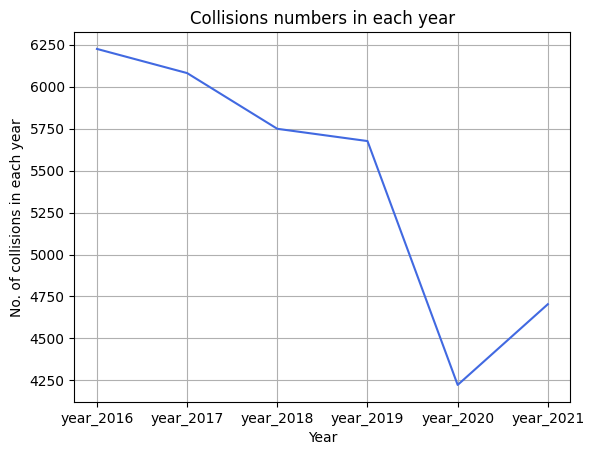

In [ ]:
plt.plot(accidents_years_ref_num.keys(),accidents_years_ref_num.values(),  color = "royalblue")
plt.grid()
plt.xlabel('Year')
plt.ylabel('No. of collisions in each year')
plt.title('Collisions numbers in each year')

In this pic, we can tell the number of collisions are gradually decrease from year 2016 to 2019, this is because the **Northern Ireland Road Safety Strategy(NIRSS)to 2020**, which was published in March 2011,outlines the key road safety challenges to be addressed by government between 2010 and 2020. It identified 4 key casualty reduction targets and 199 action measures for improving road safety. As a living document, further action measures have since been added; arising from the original measures or from completed research.
https://www.infrastructure-ni.gov.uk/articles/northern-ireland-road-safety-strategy-2020-statistics

The report 2018 shows the statistics in 2017 and can explain the reason for reletively greater decrease in the above pic.

Due to the pandanmic, less people going outside and the number falls sharply in 2020.

Now we want to check which district has more collisions, or the number of collisions of each district. Because there will be more then one record if there is not only 1 person injuried in the accidents, we will try to reduce the rows that has the same reference id in each year and them plot in histogram

In [ ]:
# districts = ni_accidents_removed["a_District"].unique()

In [ ]:
# print(districts)

### Plot distributions on columns group by a specific column

In [ ]:
# Green - red color map
cmap_gr = ListedColormap(["red","lawngreen"])

In [ ]:
#build a function to plot
def plot_stacked_texted_bar(index_col, color_by_col, x_label, y_label, title, fontsize = 10,cmap = cmap_gr,count_print = True,prop_print = True):
    cross_tab_prop = pd.crosstab(index = ni_accidents_removed[index_col],
                             columns = ni_accidents_removed[color_by_col],
                             normalize = "index")
    cross_tab = pd.crosstab(index = ni_accidents_removed[index_col],
                                 columns = ni_accidents_removed[color_by_col])

    cross_tab.plot(kind = "bar",
                       stacked = True,
                        colormap = cmap,
                        figsize = (10,6)
                       )
    # plt.grid(axis = 'y')
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)


    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                              cross_tab.loc[x],
                                              cross_tab.loc[x].cumsum()):
            if count_print == True:
                str_count = f"{count}"
            else:
                str_count = ""

            if prop_print == True:
                str_prop = f"({np.round(proportion * 100, 1)}%)"
            else:
                str_prop = ""
            str_ = str_count + "\n"+str_prop

            plt.text(x=n - 0.17,
                     y = (y_loc-(count/2)),
#                      s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                     s = str_,
                     color="black",
                     fontsize=fontsize,
                     fontweight="bold")

    plt.show()
    return cross_tab_prop, cross_tab


In [ ]:
accidents_years_no_dup_ref_dic = {}
#ni_accidents_removed[ni_accidents_removed["a_year"] == i]
for y in years:
    accidents_years_no_dup_ref_dic["year_{0}".format(y)] = accidents_years_dic["year_{0}".format(y)].drop_duplicates(subset = "a_ref")


In [ ]:
accidents_years_no_dup_ref_dic["year_2019"]

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_sever,c_school,c_vtype,lat,lon,address,postcodes,location_infos,postcodes_first4,general_injury_type
39868,2019,1,Belfast City,Slight injury collision,2,1,TUE,1,1,4,...,NaN,NaN,NaN,54.579056,-5.896800,"175 Cregagh Rd, Belfast BT6 0LB, UK",BT6 0LB,"['premise', 'plus_code', 'route', 'postal_code']",BT6,Slight injury collision
39870,2019,2,Belfast City,Slight injury collision,2,3,TUE,1,1,10,...,Slightly injured,Other,Car,54.618194,-5.861834,"Holywood Rd, Belfast BT3 9JH, UK",BT3 9JH,"['route', 'plus_code', 'postal_code', 'postal_...",BT3,Slight injury collision
39873,2019,3,"Newry, Mourne, Down",Slight injury collision,2,3,TUE,1,1,15,...,Slightly injured,Other,Car,54.100373,-6.214005,"4 Drumsesk Rd, Rostrevor, Newry BT34 3EG, UK",BT34 3EG,"['street_address', 'establishment', 'point_of_...",BT34,Slight injury collision
39877,2019,4,"Armagh City, Banbridge, Craigavon",Slight injury collision,2,2,TUE,1,1,16,...,Slightly injured,Other,Car,54.418458,-6.671491,"73 Armagh Rd, Dungannon BT71 7JA, UK",BT71 7JA,"['street_address', 'route', 'plus_code', 'prem...",BT71,Slight injury collision
39879,2019,5,Belfast City,Slight injury collision,2,1,TUE,1,1,17,...,Slightly injured,Other,Car,54.576038,-6.020920,"Work West Centre, 301-331 Glen Rd, Andersonsto...",BT11 8BU,"['street_address', 'premise', 'establishment',...",BT11,Slight injury collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52491,2019,5672,Belfast City,Serious injury collision,1,1,SAT,9,3,11,...,NaN,NaN,NaN,54.604061,-5.946988,"159 Shankill Rd, Belfast BT13 1FD, UK",BT13 1FD,"['street_address', 'premise', 'route', 'plus_c...",BT13,Serious and Fatal injury collision
52492,2019,5673,"Armagh City, Banbridge, Craigavon",Slight injury collision,1,1,SUN,7,7,16,...,NaN,NaN,NaN,54.414736,-6.151050,"25 Church St, Dromore BT25 1AA, UK",BT25 1AA,"['street_address', 'street_address', 'route', ...",BT25,Slight injury collision
52493,2019,5674,"Derry City, Strabane",Slight injury collision,2,4,THU,11,7,18,...,NaN,NaN,NaN,54.830252,-7.470937,"Bradley Way, Strabane BT82, UK",BT82,"['route', 'route', 'postal_code', 'locality', ...",BT82,Slight injury collision
52498,2019,5675,Belfast City,Slight injury collision,2,1,MON,5,8,16,...,NaN,NaN,NaN,54.627065,-5.938102,"454 Antrim Rd, Belfast BT15 5GE, UK",BT15 5GE,"['street_address', 'premise', 'street_address'...",BT15,Slight injury collision


Collision distributions in each districts in each year

Year 2016

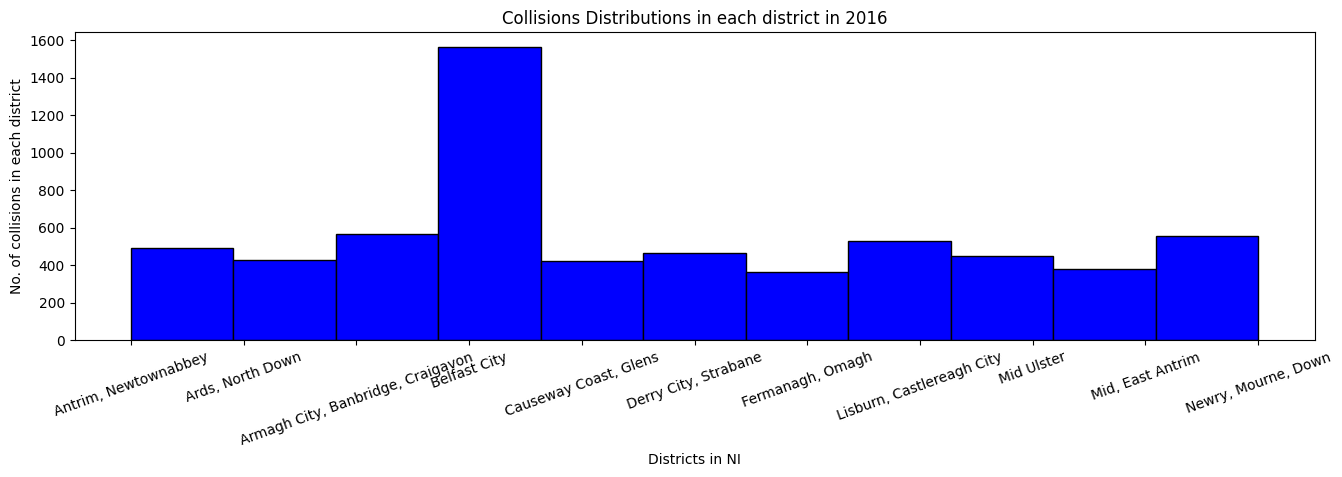

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_years_no_dup_ref_dic["year_2016"]["a_District"].sort_values(), bins = 11,edgecolor='black', color = "blue")

plt.xlabel('Districts in NI')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions Distributions in each district in 2016')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Year 2017

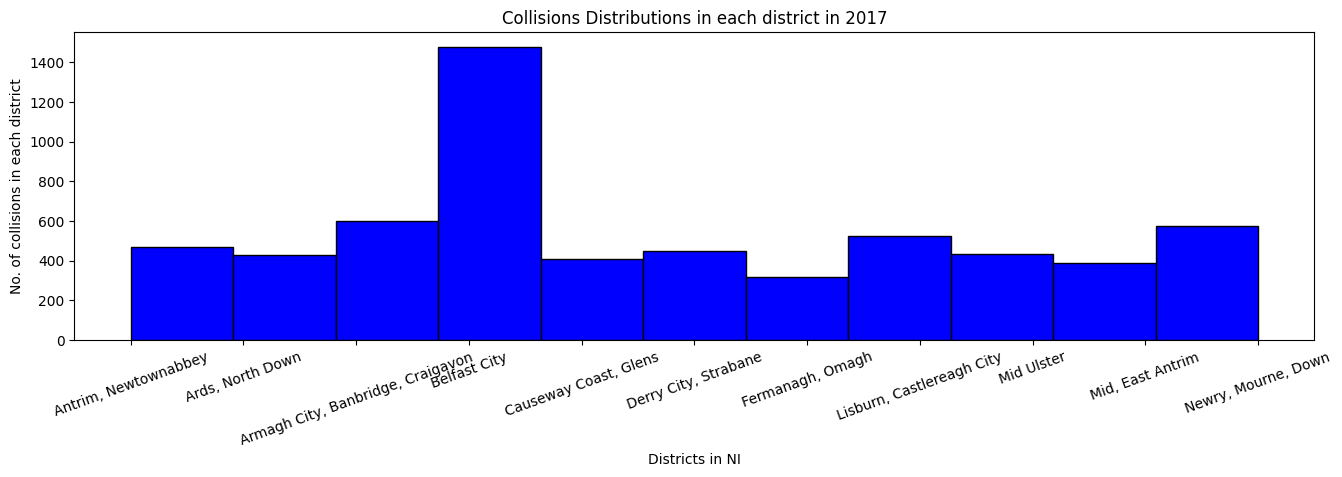

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_years_no_dup_ref_dic["year_2017"]["a_District"].sort_values(), bins = 11,edgecolor='black', color = "blue")

plt.xlabel('Districts in NI')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions Distributions in each district in 2017')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Year 2018

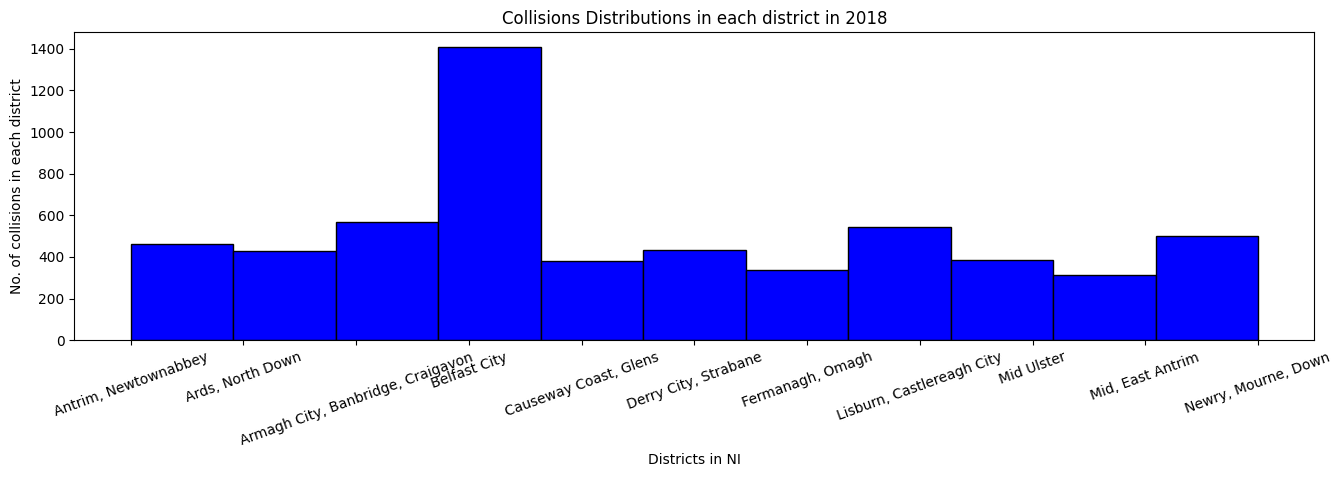

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_years_no_dup_ref_dic["year_2018"]["a_District"].sort_values(), bins = 11,edgecolor='black', color = "blue")

plt.xlabel('Districts in NI')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions Distributions in each district in 2018')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Year 2019

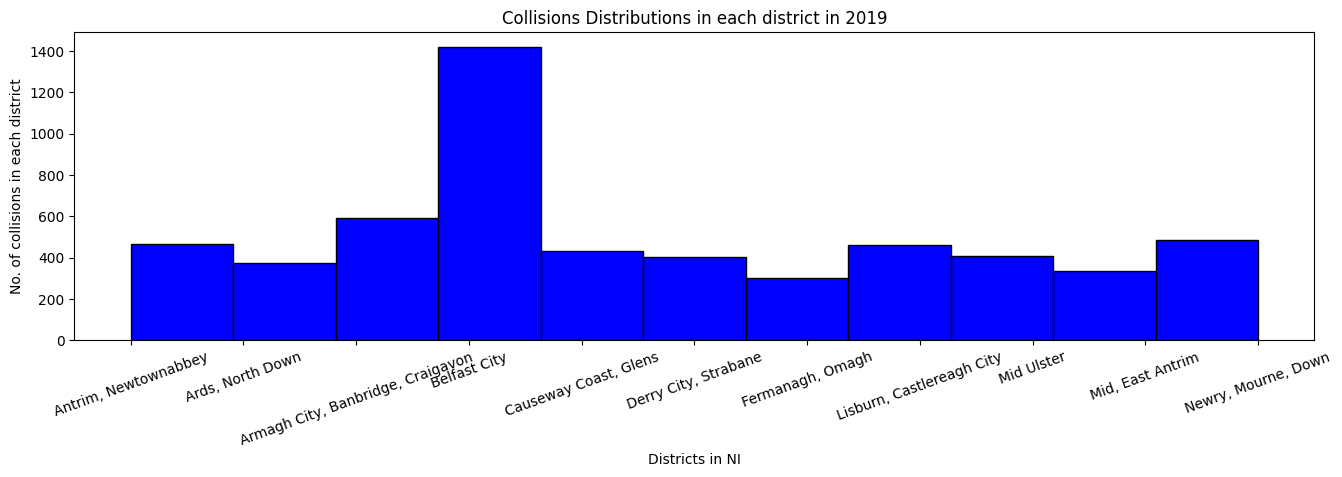

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_years_no_dup_ref_dic["year_2019"]["a_District"].sort_values(), bins = 11,edgecolor='black', color = "blue")

plt.xlabel('Districts in NI')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions Distributions in each district in 2019')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Year 2020

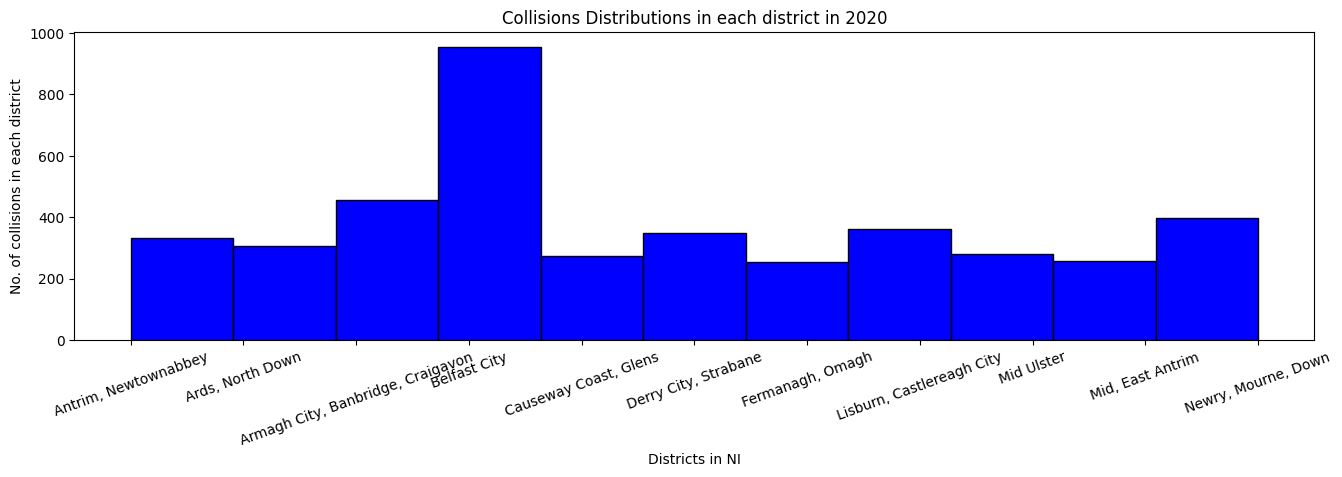

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_years_no_dup_ref_dic["year_2020"]["a_District"].sort_values(), bins = 11,edgecolor='black', color = "blue")

plt.xlabel('Districts in NI')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions Distributions in each district in 2020')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Year 2021

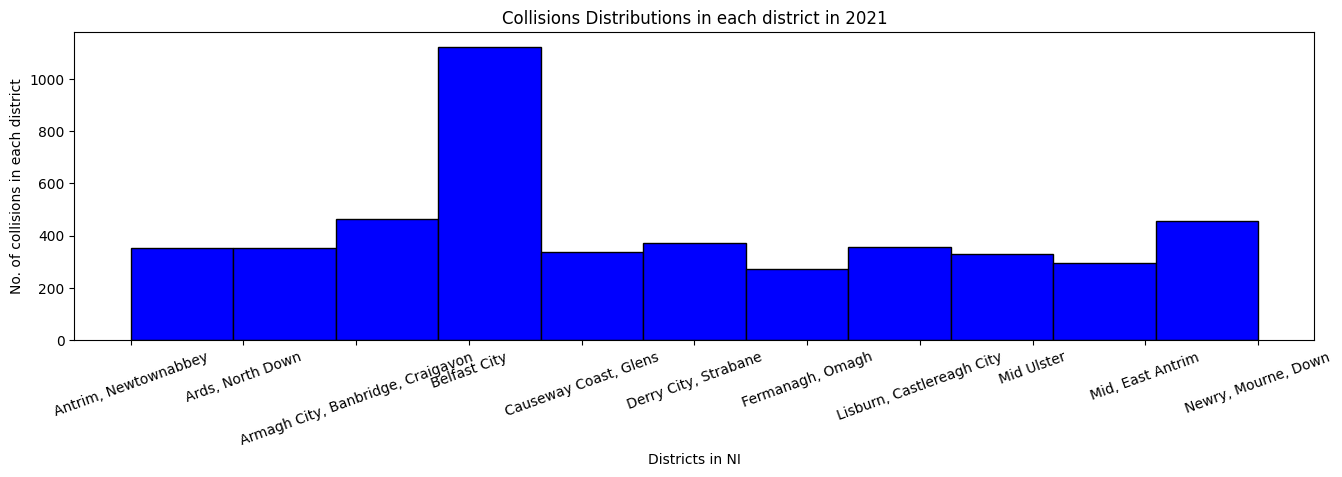

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_years_no_dup_ref_dic["year_2021"]["a_District"].sort_values(), bins = 11,edgecolor='black', color = "blue")

plt.xlabel('Districts in NI')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions Distributions in each district in 2021')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

the distribution of every year is pretty similar, and belfast city is always considerably more than other districts

Now we put all into one plot but stacked

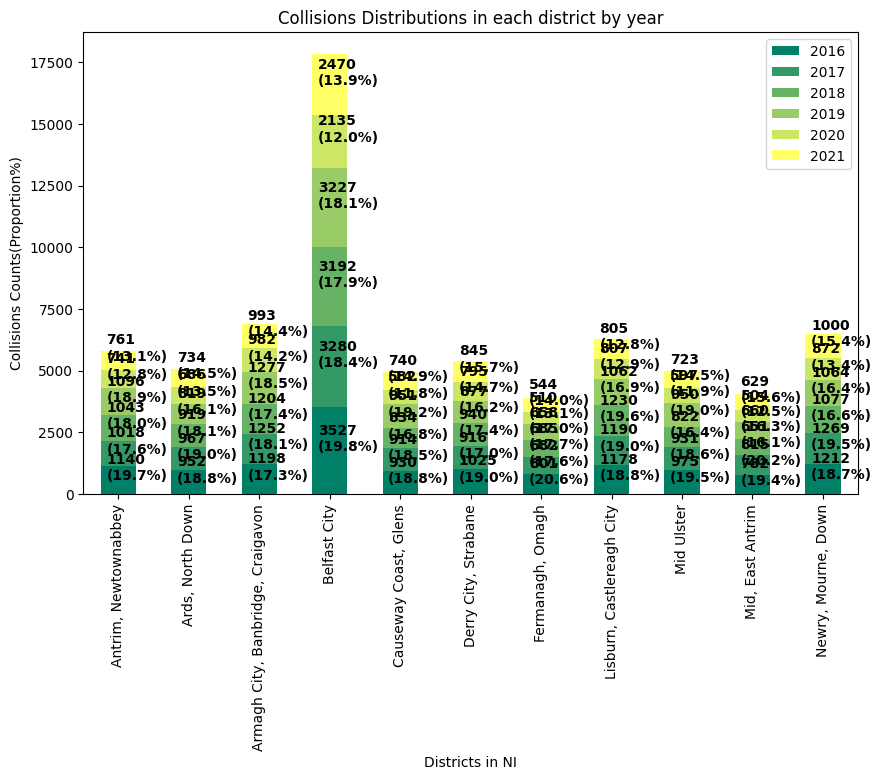

In [ ]:
dist_by_year_prop, dist_by_year_num = plot_stacked_texted_bar("a_District", "a_year", "Districts in NI",'Collisions Counts(Proportion%)','Collisions Distributions in each district by year',cmap = "summer")

In [ ]:
# colors = ["#013A63", "#22577A", "#38A3A5", "#57CC99", "#80ED99", "#C7F9CC"]
# names = list(accidents_years_no_dup_ref_dic.keys())

# fig = plt.figure(figsize=(16,6))

# plt.hist([list(df["a_District"]) for df in accidents_years_no_dup_ref_dic.values()], color = colors, label = names, density = True, stacked = True, bins = 11,edgecolor='black')

# plt.legend()
# plt.xlabel('Districts in NI')
# plt.ylabel('Percerntage of collisions in each district')
# plt.title('Collisions Distributions in each district')
# plt.xticks(rotation=20)
# plt.tick_params(axis='x', labelsize=10)

In [ ]:
accidents_no_dup_ref_df = pd.DataFrame()
for df in accidents_years_no_dup_ref_dic.values():
    accidents_no_dup_ref_df = pd.concat([accidents_no_dup_ref_df,df])
accidents_no_dup_ref_df

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_sever,c_school,c_vtype,lat,lon,address,postcodes,location_infos,postcodes_first4,general_injury_type
0,2016,1,"Newry, Mourne, Down",Slight injury collision,1,1,FRI,1,1,1,...,Slightly injured,Other,Car,54.379157,-5.685504,"87 Killyleagh Rd, Downpatrick BT30 9UD, UK",BT30 9UD,"['street_address', 'establishment', 'point_of_...",BT30,Slight injury collision
1,2016,2,"Derry City, Strabane",Slight injury collision,2,1,FRI,1,1,3,...,NaN,NaN,NaN,55.019106,-7.294136,"Foyle Bridge, Londonderry BT48, UK",BT48,"['route', 'plus_code', 'premise', 'street_addr...",BT48,Slight injury collision
5,2016,3,"Ards, North Down",Serious injury collision,1,1,FRI,1,1,3,...,Seriously injured,Other,Car,54.476645,-5.692128,"28 Comber Rd, Killinchy, Newtownards BT23 6PB, UK",BT23 6PB,"['premise', 'street_address', 'establishment',...",BT23,Serious and Fatal injury collision
7,2016,4,Belfast City,Slight injury collision,2,2,FRI,1,1,3,...,NaN,NaN,NaN,54.593451,-5.887517,"8/367 Beersbridge Rd, Belfast BT5 5EF, UK",BT5 5EF,"['premise', 'establishment', 'health', 'point_...",BT5,Slight injury collision
10,2016,5,Belfast City,Slight injury collision,2,1,FRI,1,1,15,...,Slightly injured,Other,Car,54.595991,-5.930017,"15 Linenhall St, Belfast BT2 8AA, UK",BT2 8AA,"['street_address', 'premise', 'establishment',...",BT2,Slight injury collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71956,2021,4700,"Lisburn, Castlereagh City",Slight injury collision,2,1,WED,14,7,20,...,Slightly injured,Other,Car,54.565303,-5.911502,"Drunkeen Complex, Upper Galwally, Belfast BT8 ...",BT8 6FY,"['premise', 'street_address', 'route', 'plus_c...",BT8,Slight injury collision
71958,2021,4701,Mid Ulster,Slight injury collision,1,1,FRI,13,8,3,...,Slightly injured,Other,Car,54.757221,-6.507611,"70 Creagh Rd, Magherafelt BT45 8EW, UK",BT45 8EW,"['premise', 'street_address', 'plus_code', 'ro...",BT45,Slight injury collision
71959,2021,4702,Belfast City,Slight injury collision,1,1,TUE,7,9,17,...,Slightly injured,Other,Bus or coach (17+ passengers),54.595441,-5.901743,"185 Albertbridge Rd, Belfast BT5 4PW, UK",BT5 4PW,"['street_address', 'establishment', 'point_of_...",BT5,Slight injury collision
71960,2021,4703,"Antrim, Newtownabbey",Serious injury collision,2,2,WED,15,9,23,...,Seriously injured,Other,Car,54.641153,-6.055369,"Clady Corner, Crumlin BT29 4UN, UK",BT29 4UN,"['establishment', 'point_of_interest', 'transi...",BT29,Serious and Fatal injury collision


General injury severity a_type

In [ ]:
# fig = plt.figure(figsize=(5,8))
# colors = ["#013A63", "#22577A", "#38A3A5", "#57CC99", "#80ED99", "#C7F9CC"]
# names = list(accidents_years_no_dup_ref_dic.keys())

# plt.hist([list(df["a_type"]) for df in accidents_years_no_dup_ref_dic.values()], color = colors, label = names, density = True, stacked = True,edgecolor='black')

# plt.legend()
# plt.xlabel('Injury Severity')
# plt.ylabel('No. of collisions')
# plt.title('Collisions Distributions of each injury severity')

Since slight injury takes most part of all the injuries, and we will conmine serious and fatal together

In [ ]:
# fig = plt.figure(figsize=(4,10))
# colors = ["#013A63", "#22577A", "#38A3A5", "#57CC99", "#80ED99", "#C7F9CC"]
# names = list(accidents_years_no_dup_ref_dic.keys())

# plt.hist([list(df["general_injury_type"]) for df in accidents_years_no_dup_ref_dic.values()], color = colors, label = names, density = True, stacked = True,edgecolor='black')
# plt.legend()
# plt.xlabel('Injury Severity')
# plt.ylabel('No. of collisions(in thousand)')
# plt.title('Collisions Distributions of each injury severity')


Belfast has quite considerable differences from other areas, the much higher number of car accidents is due to the larger population of Belfast

In [ ]:
weekdays_count= accidents_no_dup_ref_df["a_wkday"].value_counts()
weekdays_count

FRI    5442
THU    5085
WED    4881
TUE    4728
MON    4559
SAT    4423
SUN    3540
Name: a_wkday, dtype: int64

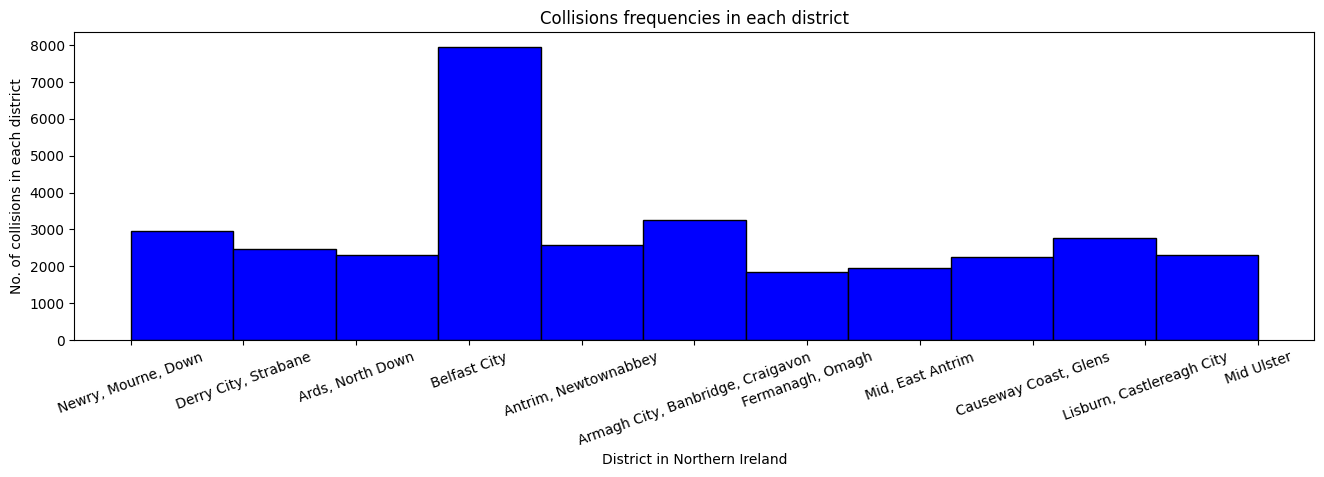

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(accidents_no_dup_ref_df["a_District"], bins = 11,edgecolor='black', color = "blue")

plt.xlabel('District in Northern Ireland')
plt.ylabel('No. of collisions in each district')
plt.title('Collisions frequencies in each district')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Text(0.5, 1.0, 'Collisions frequencies on every weekday')

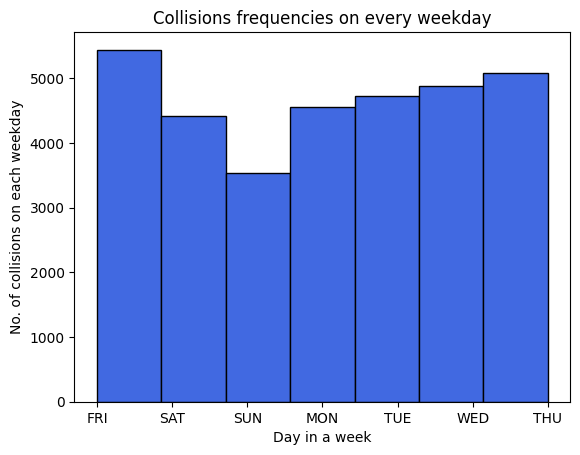

In [ ]:
# on which day of the week, has the most collision
# plt.grid()
plt.hist(accidents_no_dup_ref_df["a_wkday"], bins = 7,edgecolor='black', color = "royalblue")

plt.xlabel('Day in a week')
plt.ylabel('No. of collisions on each weekday')
plt.title('Collisions frequencies on every weekday')


Text(0.5, 1.0, 'Collisions frequencies on every hour')

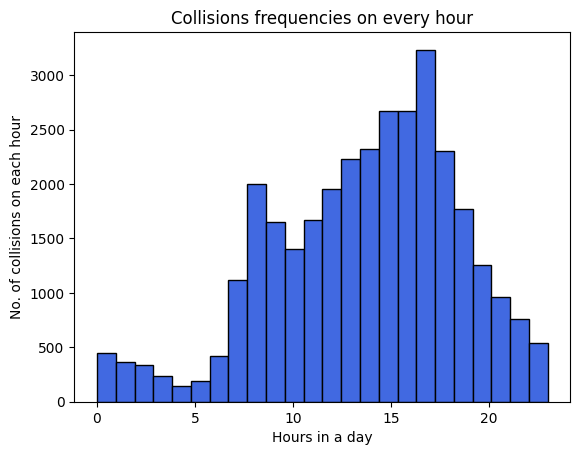

In [ ]:
# in which hour, has the most collision
plt.hist(accidents_no_dup_ref_df["a_hour"], bins = 24,edgecolor='black', color = "royalblue")

plt.xlabel('Hours in a day')
plt.ylabel('No. of collisions on each hour')
plt.title('Collisions frequencies on every hour')

Text(0.5, 1.0, 'Collisions frequencies in each month')

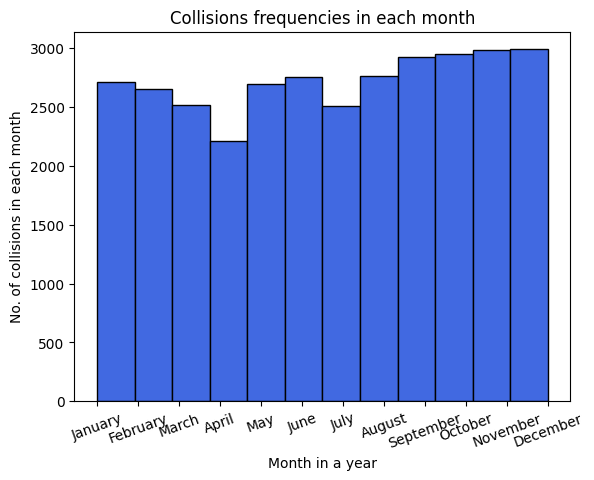

In [ ]:
# in which month, has the most collision
plt.hist(accidents_no_dup_ref_df["a_month"], bins = 12,edgecolor='black', color = "royalblue")
plt.xticks(np.arange(1, 13, step=1),['January', 'February', 'March','April', 'May', 'June', 'July', 'August','September','October', 'November','December'],rotation=20)

plt.xlabel('Month in a year')
plt.ylabel('No. of collisions in each month')
plt.title('Collisions frequencies in each month')

In [ ]:
loc = accidents_no_dup_ref_df[accidents_no_dup_ref_df["v_loc"].notna()]

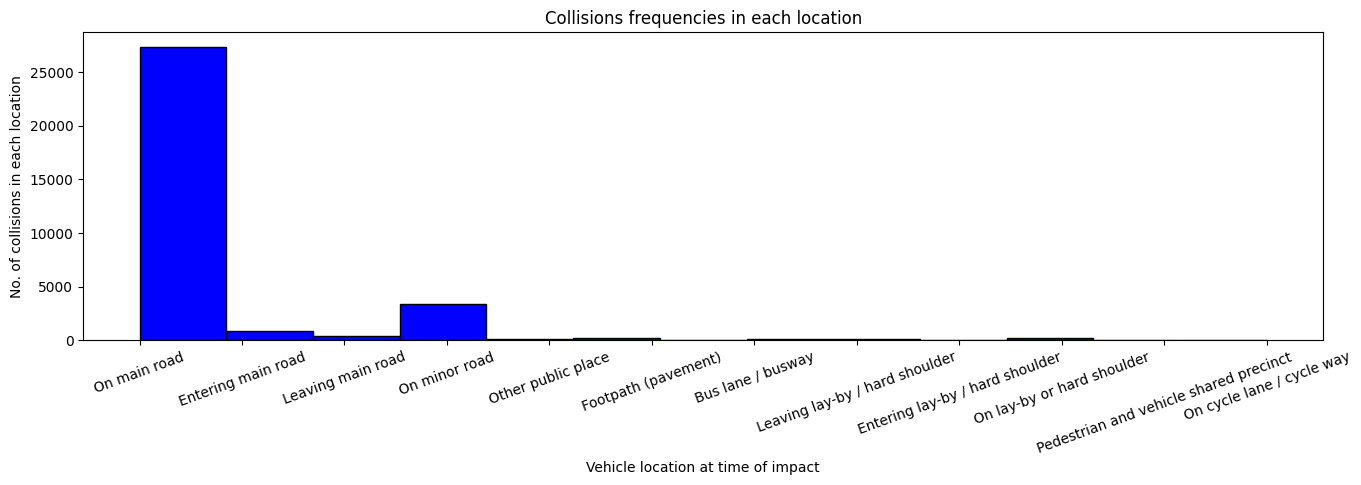

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.hist(loc["v_loc"],bins = 13,edgecolor='black', color = "blue")

plt.xlabel('Vehicle location at time of impact')
plt.ylabel('No. of collisions in each location')
plt.title('Collisions frequencies in each location')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

Text(0.5, 1.0, 'Collisions frequencies in each impact place')

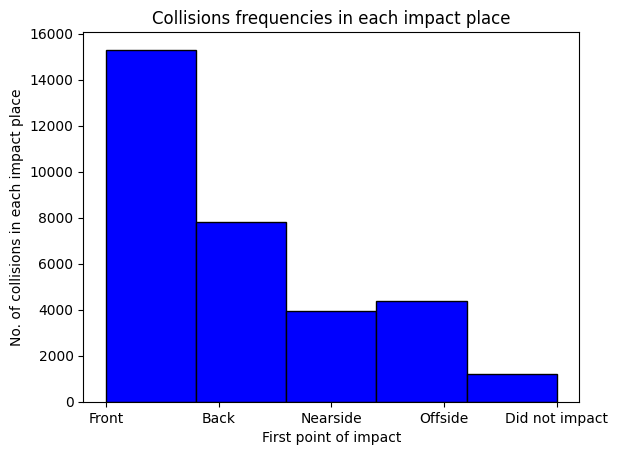

In [ ]:
impact = accidents_no_dup_ref_df[accidents_no_dup_ref_df["v_impact"].notna()]
plt.hist(impact["v_impact"], bins = 5,edgecolor='black', color = "blue")

plt.xlabel('First point of impact')
plt.ylabel('No. of collisions in each impact place')
plt.title('Collisions frequencies in each impact place')

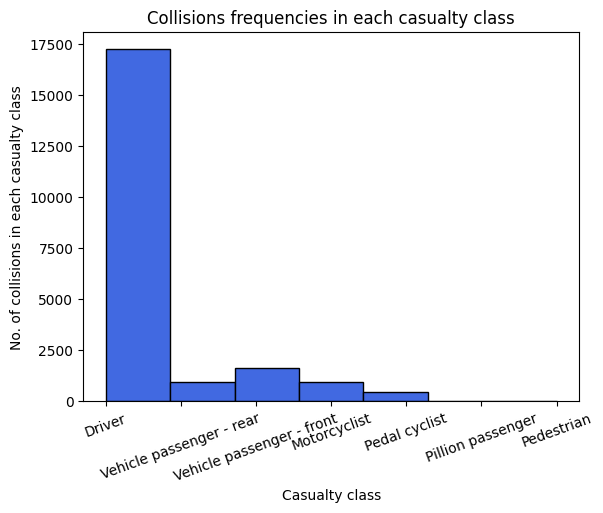

In [ ]:
cclass = accidents_no_dup_ref_df[accidents_no_dup_ref_df["c_class"].notna()]
plt.hist(cclass["c_class"], bins = 7,edgecolor='black', color = "royalblue")

plt.xlabel('Casualty class')
plt.ylabel('No. of collisions in each casualty class')
plt.title('Collisions frequencies in each casualty class')
plt.xticks(rotation=20)
plt.tick_params(axis='x', labelsize=10)

In [ ]:
# # on what kind of the vehicle, has the most collision
# fig = plt.figure(figsize=(16,6))

# plt.hist(accidents_no_dup_ref_df["v_type"], bins = 22,edgecolor='black')

# plt.xlabel('Vehicle Type')
# plt.ylabel('No. of collisions of each vehicle type')
# plt.title('Collisions frequencies of each vehicle type')

Text(0.5, 1.0, 'Collisions frequencies of each gender')

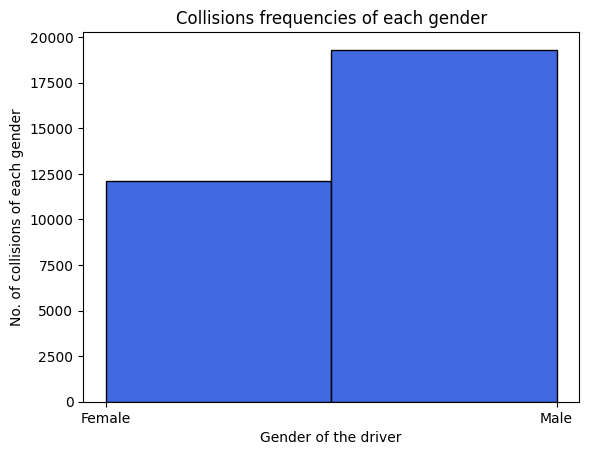

In [ ]:
#  Gender of the driver
has_gender = accidents_no_dup_ref_df.loc[accidents_no_dup_ref_df["v_sex"].isin(["Female", "Male"])]
# has_gender
plt.hist(has_gender["v_sex"] ,bins = 2,edgecolor='black', color = "royalblue")
plt.xlabel('Gender of the driver')
plt.ylabel('No. of collisions of each gender')
plt.title('Collisions frequencies of each gender')

Text(0.5, 1.0, 'Collisions frequencies of each gender')

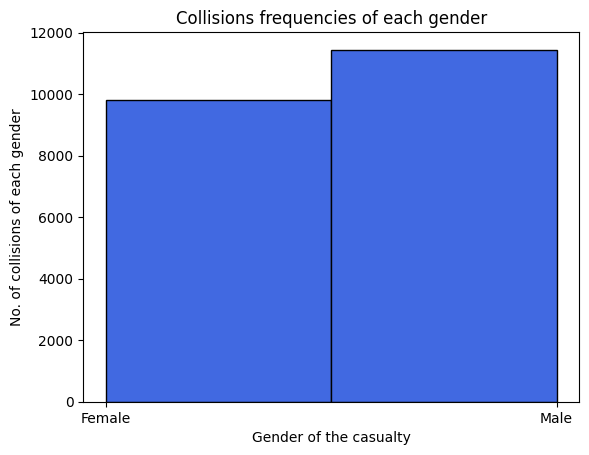

In [ ]:
#  Gender of the casualty
has_gender_c = accidents_no_dup_ref_df.loc[accidents_no_dup_ref_df["c_sex"].isin(["Female", "Male"])]
# has_gender
plt.hist(has_gender_c["c_sex"] ,bins = 2,edgecolor='black', color = "royalblue")
plt.xlabel('Gender of the casualty')
plt.ylabel('No. of collisions of each gender')
plt.title('Collisions frequencies of each gender')

In [ ]:
# ni_accidents_removed = ni_accidents_removed[ni_accidents_removed["v_agegroup"].notna()]
ni_accidents_removed["v_agegroup"] = ni_accidents_removed["v_agegroup"].fillna("Unknown")


<ipython-input-72-0ddd569b08ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["v_agegroup"] = ni_accidents_removed["v_agegroup"].fillna("Unknown")


In [ ]:
# Age of driver
# ni_accidents_removed["v_agegroup"].unique()
niar_v = pd.Categorical(ni_accidents_removed["v_agegroup"],['Under 10', '10-16', '17-24','25-34','35-44','45-54','55-64','65+', 'Unknown'])

In [ ]:
# niar_v.sort_values()

Text(0.5, 1.0, 'Collisions frequencies of each age group of driver')

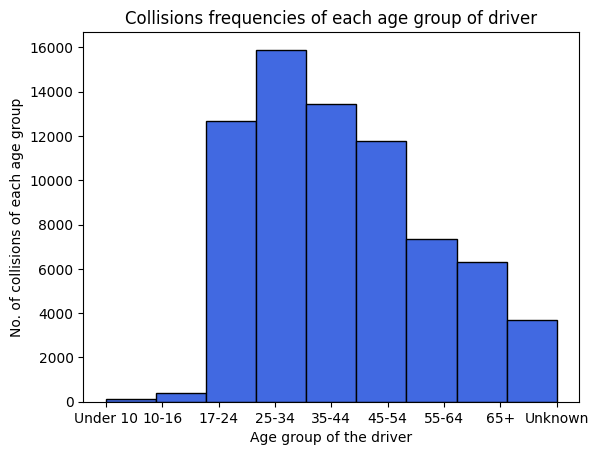

In [ ]:
plt.hist(niar_v.sort_values(), bins = 9, edgecolor='black', color = "royalblue")
plt.xlabel('Age group of the driver')
plt.ylabel('No. of collisions of each age group')
plt.title('Collisions frequencies of each age group of driver')

In [ ]:
# Age of Casualty
ni_accidents_removed["c_agegroup"] = ni_accidents_removed["c_agegroup"].fillna("Unknown")


<ipython-input-76-66b8d0d4bdce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["c_agegroup"] = ni_accidents_removed["c_agegroup"].fillna("Unknown")


In [ ]:
ni_accidents_removed[ni_accidents_removed["c_agegroup"].isna()]

# ni_accidents_removed.head()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,c_sever,c_school,c_vtype,lat,lon,address,postcodes,location_infos,postcodes_first4,general_injury_type


In [ ]:
niar_c = pd.Categorical(ni_accidents_removed["c_agegroup"],categories = ['Under10', '10-16', '17-24','25-34','35-44','45-54','55-64','65+', 'Unknown'])

In [ ]:
# niar_c.sort_values()

Text(0.5, 1.0, 'Collisions frequencies of each age group of casualty')

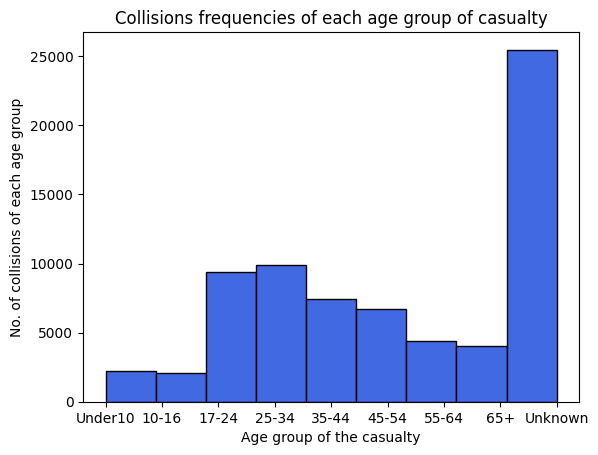

In [ ]:
plt.hist(niar_c.sort_values(), bins = 9, edgecolor='black', color = "royalblue")
plt.xlabel('Age group of the casualty')
plt.ylabel('No. of collisions of each age group')
plt.title('Collisions frequencies of each age group of casualty')

In [ ]:
# exclude unknown
casualty_agegroup = pd.DataFrame()
casualty_agegroup["agegroup"] = ni_accidents_removed["c_agegroup"]

In [ ]:
# casualty_agegroup = casualty_agegroup.drop()
casualty_agegroup_known = casualty_agegroup[casualty_agegroup["agegroup"]!="Unknown"]

In [ ]:
nicak = pd.Categorical(casualty_agegroup_known["agegroup"],categories = ['Under10', '10-16', '17-24','25-34','35-44','45-54','55-64','65+'])

Text(0.5, 1.0, 'Collisions frequencies of each age group of casualty')

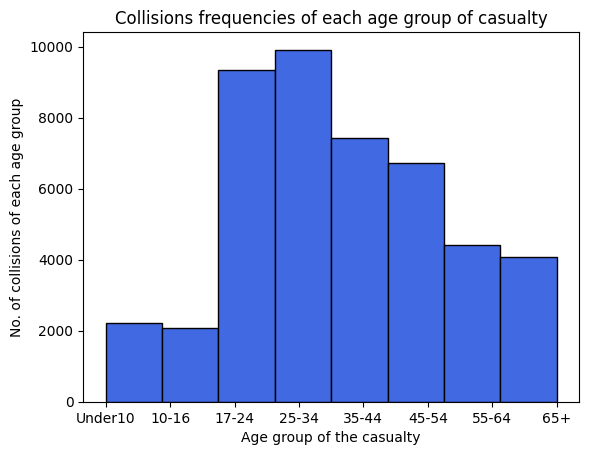

In [ ]:
plt.hist(nicak.sort_values(), bins = 8, edgecolor='black', color = "royalblue")
plt.xlabel('Age group of the casualty')
plt.ylabel('No. of collisions of each age group')
plt.title('Collisions frequencies of each age group of casualty')

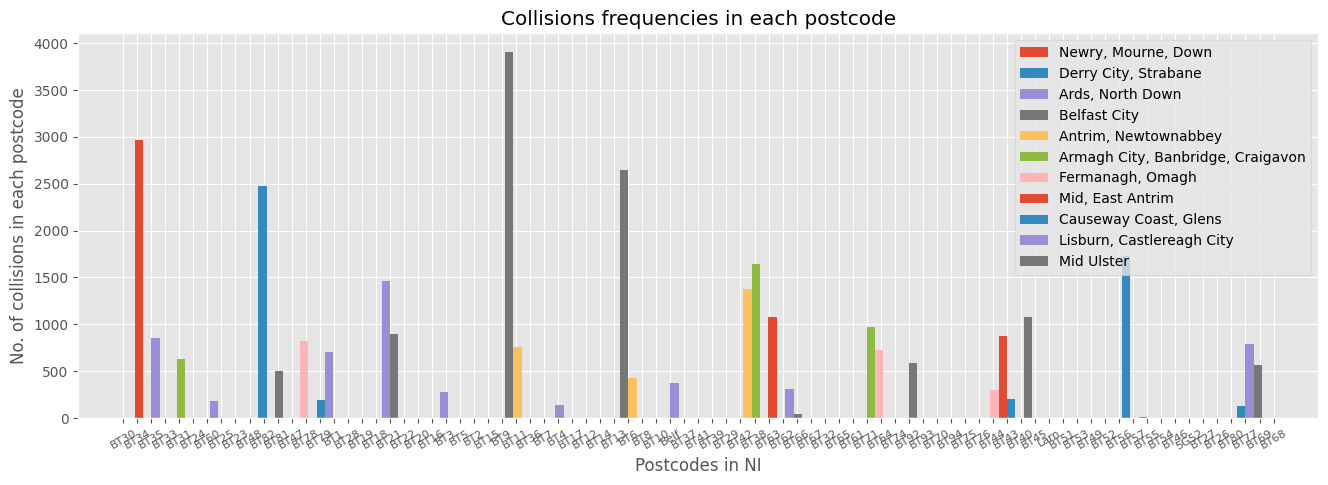

In [ ]:
# in which postcode, has the most collision
fig = plt.figure(figsize=(16,5))
districts = accidents_no_dup_ref_df["a_District"].unique()

# plt.hist(accidents_no_dup_ref_df["postcodes_first4"].sort_values(),bins = 81,edgecolor='black', color = 'blue')
plt.hist([accidents_no_dup_ref_df.loc[accidents_no_dup_ref_df["a_District"] == x, "postcodes_first4"] for x in districts])
# accidents_no_dup_ref_df.pivot(columns='a_District', values='postcodes_first4').plot.hist()

plt.legend(districts)
plt.xlabel('Postcodes in NI')
plt.ylabel('No. of collisions in each postcode')
plt.title('Collisions frequencies in each postcode')
plt.xticks(rotation=30)
plt.tick_params(axis='x', labelsize=8)

plt.show()

# get rid of the space at the start and the end
# sort values still need to be sorted

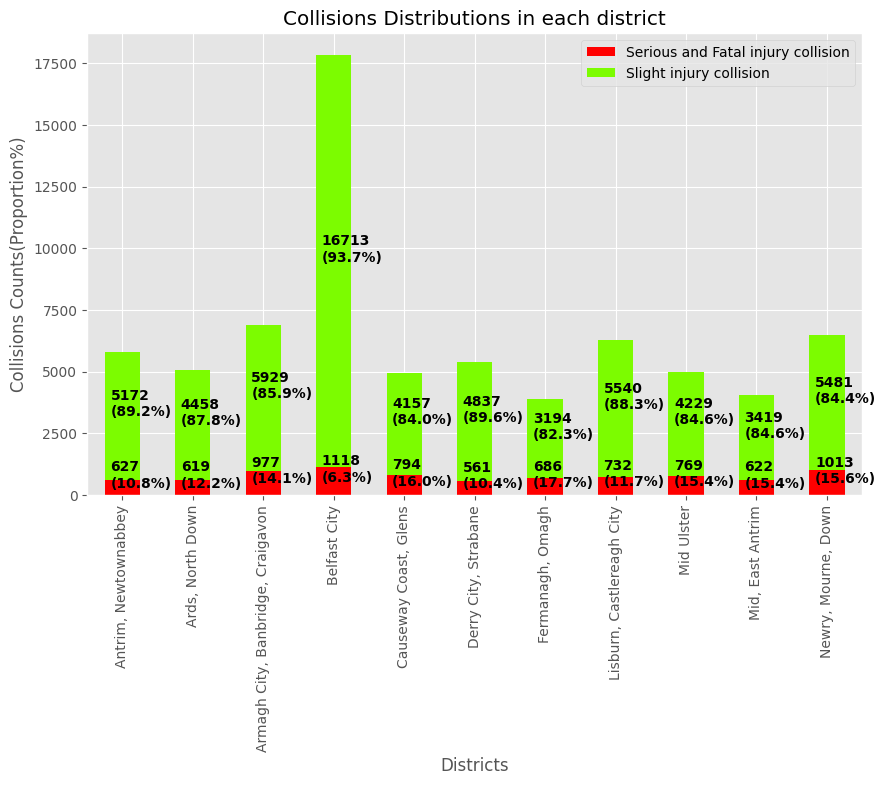

In [ ]:
#District
discrict_prop, discrict_num = plot_stacked_texted_bar("a_District", "general_injury_type", "Districts",'Collisions Counts(Proportion%)','Collisions Distributions in each district')


In [ ]:
# discrict_num

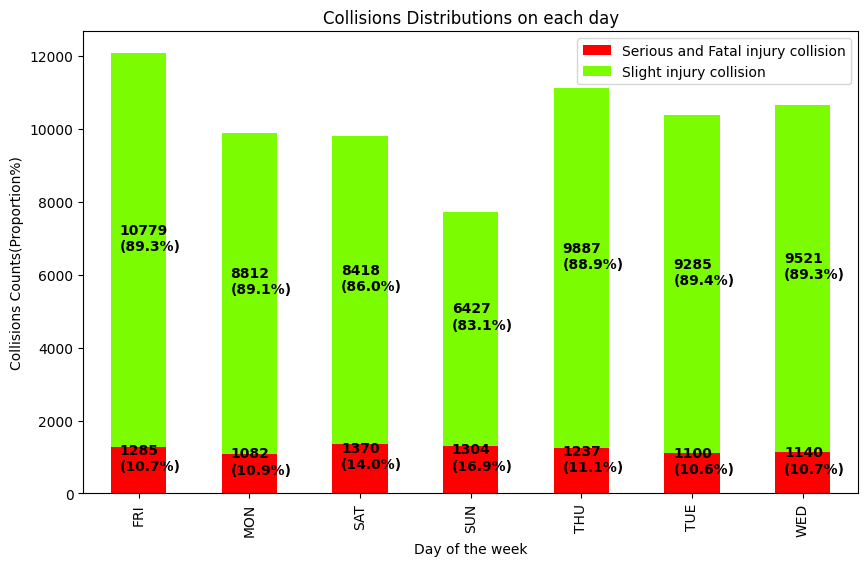

In [ ]:
# Day of the week
weekdat_prop, weekday_num = plot_stacked_texted_bar("a_wkday", "general_injury_type", "Day of the week",'Collisions Counts(Proportion%)','Collisions Distributions on each day')

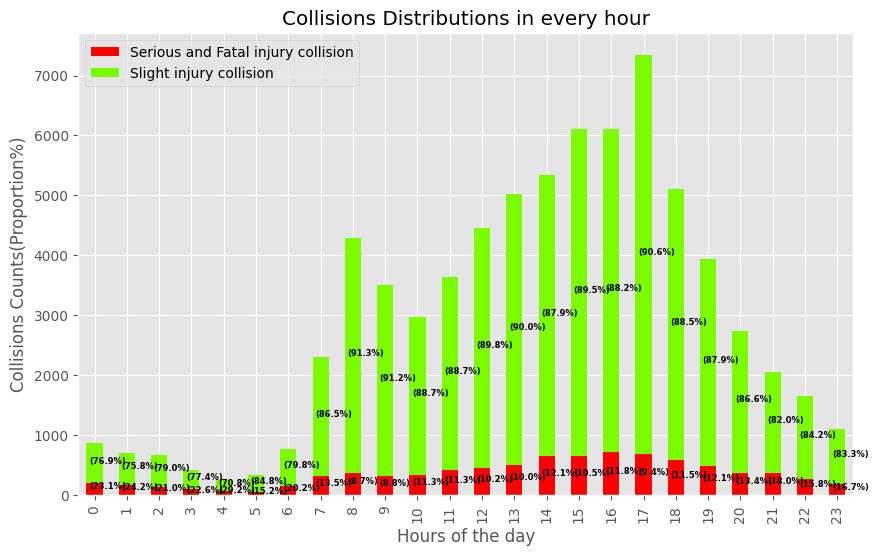

In [ ]:
# Hour of the day
hours_prop, hours_num = plot_stacked_texted_bar("a_hour", "general_injury_type", "Hours of the day",'Collisions Counts(Proportion%)','Collisions Distributions in every hour',fontsize = 6,count_print = False)

In [ ]:
hours_prop.sort_values(by = "Serious and Fatal injury collision", ascending = False)

general_injury_type,Serious and Fatal injury collision,Slight injury collision
a_hour,,
4,0.292000,0.708000
1,0.241774,0.758226
0,0.231395,0.768605
3,0.226277,0.773723
2,0.209653,0.790347
6,0.201581,0.798419
21,0.179562,0.820438
23,0.167429,0.832571
22,0.158500,0.841500


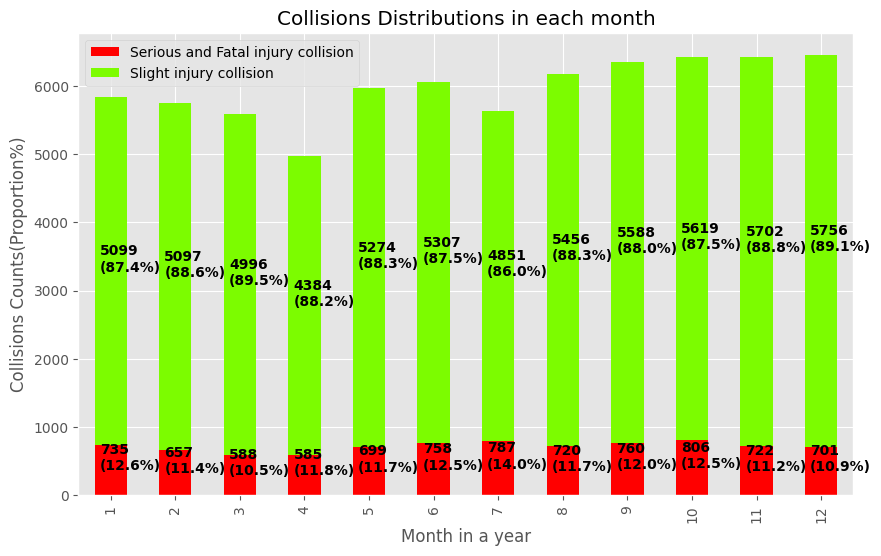

In [ ]:
# month of the year
month_prop, month_num = plot_stacked_texted_bar("a_month", "general_injury_type", "Month in a year",'Collisions Counts(Proportion%)','Collisions Distributions in each month')

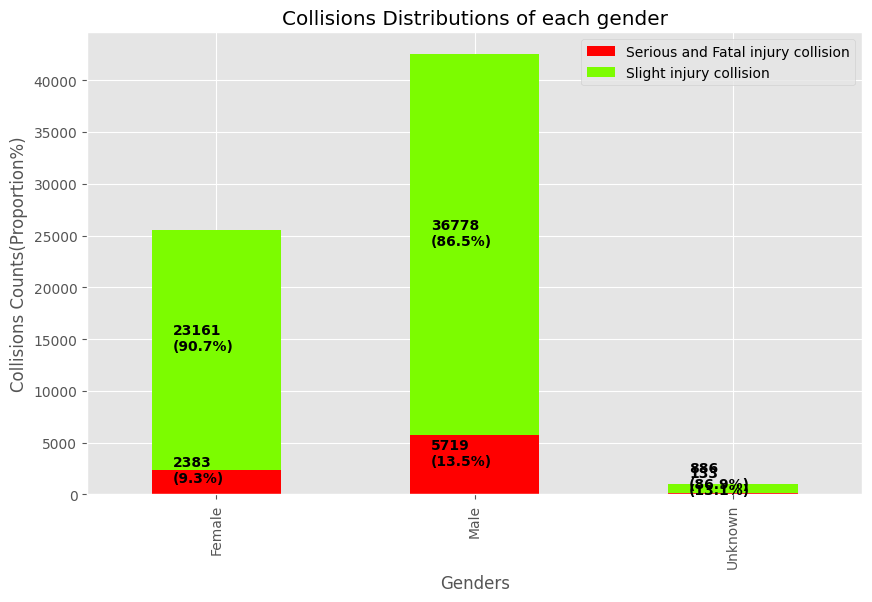

In [ ]:
# Gender of driver
gender_prop, gender_num = plot_stacked_texted_bar("v_sex", "general_injury_type", "Genders",'Collisions Counts(Proportion%)','Collisions Distributions of each gender')

In [ ]:
cross_tab_gender_by_injury_prop = pd.crosstab(index = ni_accidents_removed["v_sex"],
                             columns = ni_accidents_removed["general_injury_type"],
                             normalize = "index")
# cross_tab_gender_by_injury_prop

cross_tab_gender_by_injury = pd.crosstab(index = ni_accidents_removed["v_sex"],
                             columns = ni_accidents_removed["general_injury_type"])
# cross_tab_gender_by_injury

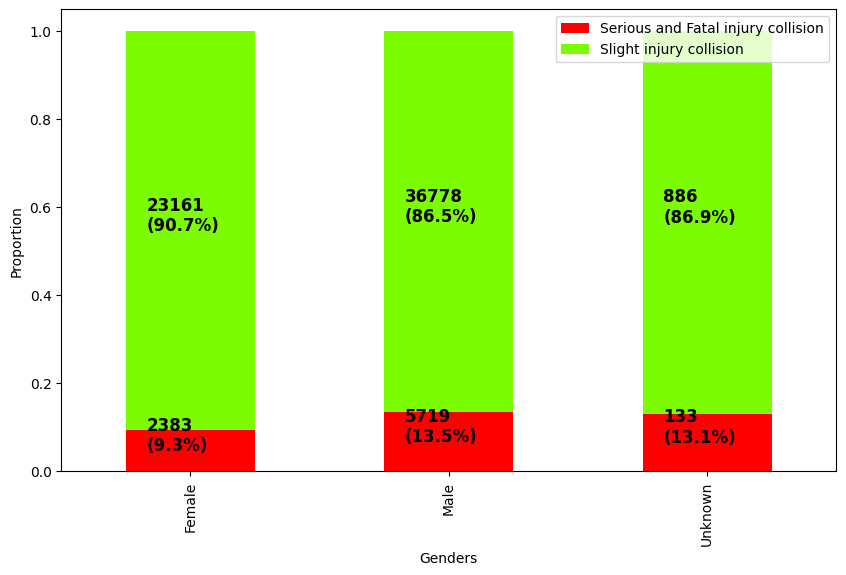

In [ ]:
cross_tab_gender_by_injury_prop.plot(kind = "bar",
                   stacked = True,
                    colormap = cmap_gr,
                    figsize = (10,6)
                   )
plt.legend()
plt.xlabel('Genders')
plt.ylabel('Proportion')

for n, x in enumerate([*cross_tab_gender_by_injury.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_gender_by_injury_prop.loc[x],
                                          cross_tab_gender_by_injury.loc[x],
                                          cross_tab_gender_by_injury_prop.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=(y_loc-(proportion/2)),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

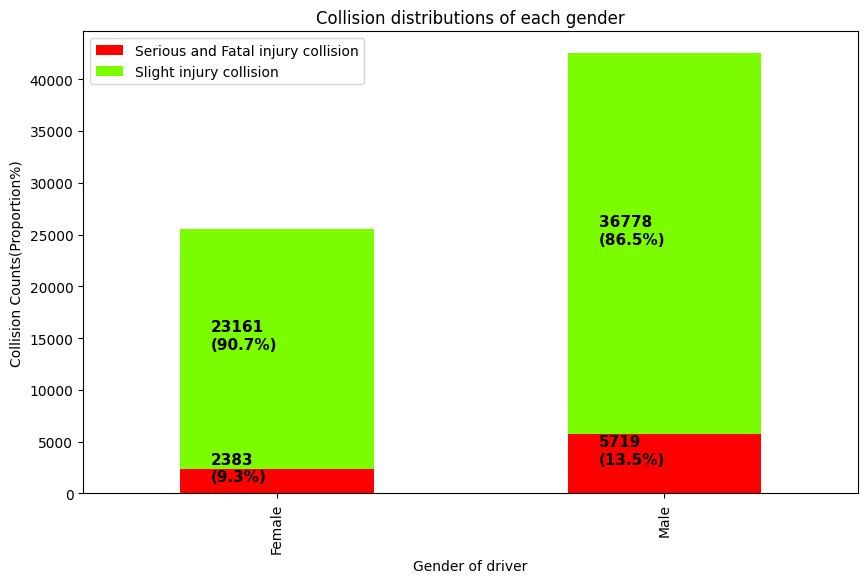

In [ ]:
cross_tab_gender_by_injury[:2].plot(kind = "bar",
                   stacked = True,
                    colormap = cmap_gr,
                    figsize = (10,6)
                   )
plt.legend()
plt.xlabel('Gender of driver')
plt.ylabel('Collision Counts(Proportion%)')
plt.title("Collision distributions of each gender")

for n, x in enumerate([*cross_tab_gender_by_injury[:2].index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_gender_by_injury_prop[:2].loc[x],
                                          cross_tab_gender_by_injury[:2].loc[x],
                                          cross_tab_gender_by_injury[:2].loc[x].cumsum()):

        plt.text(x=n - 0.17,
#                  y=count,
                 y = (y_loc-(count/2)),
#                  y = (count-y_loc)-(count/2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=11,
                 fontweight="bold")

# plt.grid(axis = 'y')
plt.show()

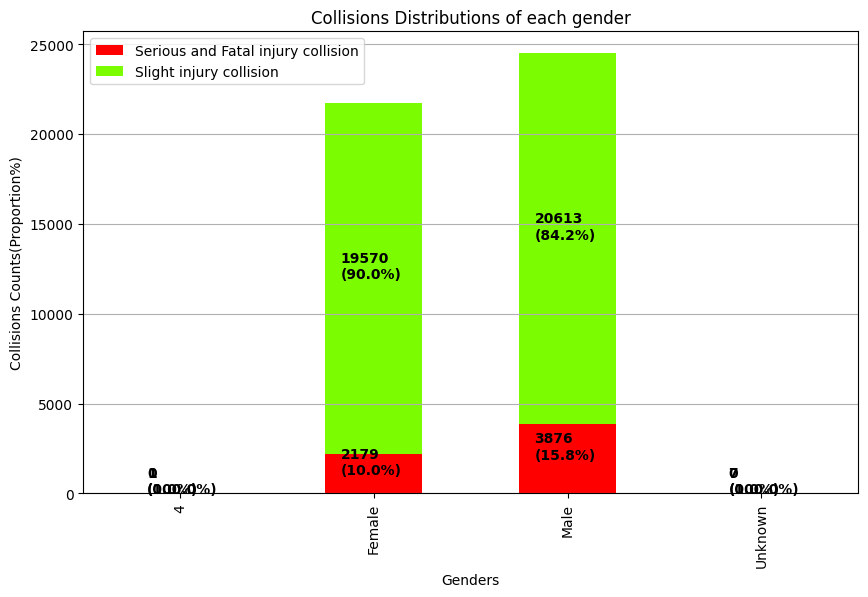

In [ ]:
# Gender of casualty
gender_prop, gender_num = plot_stacked_texted_bar("c_sex", "general_injury_type", "Genders",'Collisions Counts(Proportion%)','Collisions Distributions of each gender')

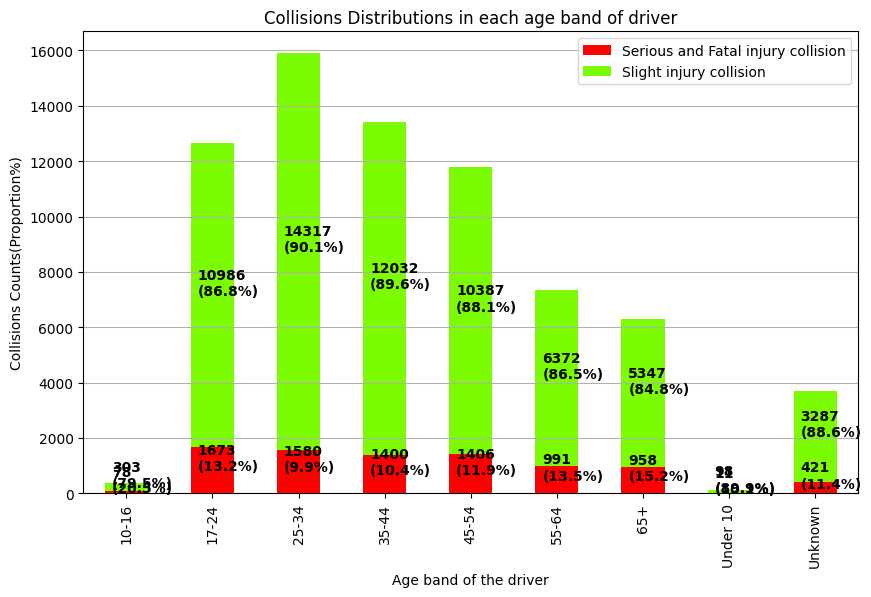

In [ ]:
# Agegroup of the driver
v_age_prop, v_age_num = plot_stacked_texted_bar("v_agegroup", "general_injury_type", "Age band of the driver",'Collisions Counts(Proportion%)','Collisions Distributions in each age band of driver')

In [ ]:
v_age_prop.sort_values(by = "Serious and Fatal injury collision", ascending = False)

general_injury_type,Serious and Fatal injury collision,Slight injury collision
v_agegroup,,
10-16,0.204724,0.795276
65+,0.151943,0.848057
55-64,0.134592,0.865408
17-24,0.132159,0.867841
45-54,0.119223,0.880777
Unknown,0.113538,0.886462
35-44,0.104229,0.895771
Under 10,0.100917,0.899083
25-34,0.099390,0.900610


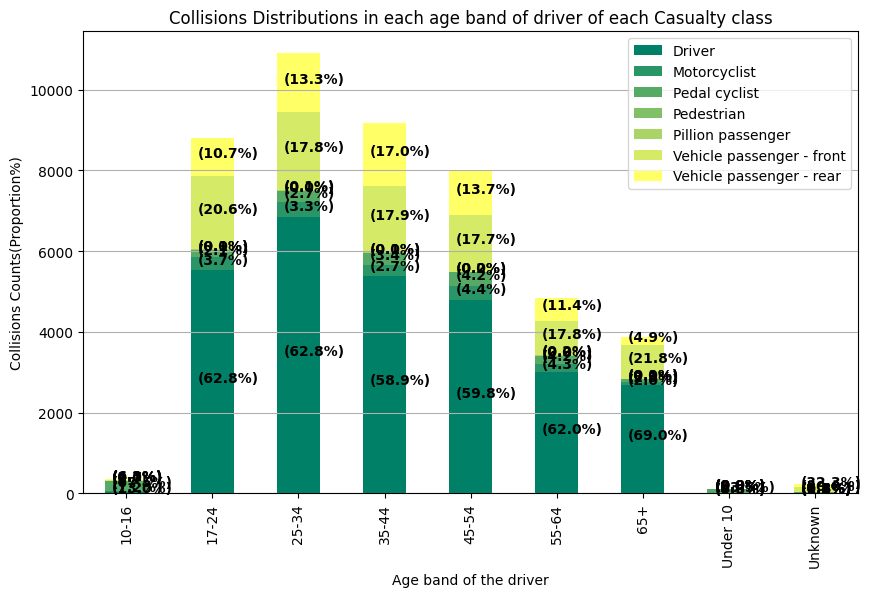

In [ ]:
v_age_prop, v_age_num = plot_stacked_texted_bar( "v_agegroup","c_class", "Age band of the driver",'Collisions Counts(Proportion%)','Collisions Distributions in each age band of driver of each Casualty class',cmap = "summer",count_print = False)

In [ ]:
v_age_prop

c_class,Driver,Motorcyclist,Pedal cyclist,Pedestrian,Pillion passenger,Vehicle passenger - front,Vehicle passenger - rear
v_agegroup,,,,,,,
10-16,0.130435,0.072464,0.675362,0.000000,0.017391,0.060870,0.043478
17-24,0.627712,0.036570,0.020897,0.000000,0.001249,0.206133,0.107439
25-34,0.628108,0.033208,0.026603,0.000092,0.001101,0.177690,0.133199
35-44,0.588826,0.027281,0.033719,0.000000,0.001309,0.179289,0.169577
45-54,0.597625,0.044000,0.042375,0.000000,0.002125,0.177125,0.136750
55-64,0.619876,0.043478,0.042443,0.000207,0.002070,0.178054,0.113872
65+,0.689904,0.019623,0.022721,0.000000,0.000516,0.217919,0.049316
Under 10,0.046296,0.009259,0.935185,0.000000,0.000000,0.000000,0.009259
Unknown,0.072727,0.018182,0.068182,0.004545,0.013636,0.500000,0.322727


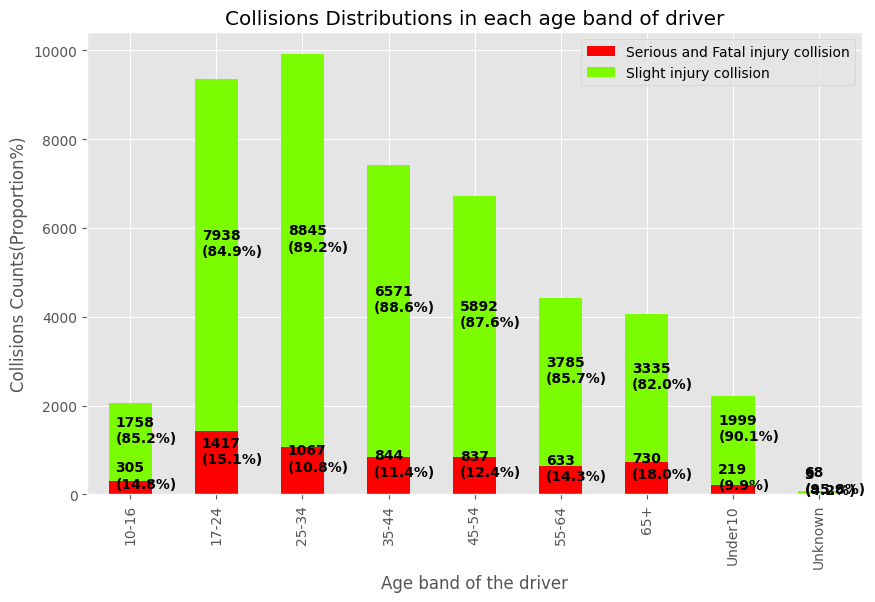

In [ ]:
# Agegroup of the casualty
c_age_prop, c_age_num = plot_stacked_texted_bar("c_agegroup", "general_injury_type", "Age band of the driver",'Collisions Counts(Proportion%)','Collisions Distributions in each age band of driver')

In [ ]:
c_age_prop.sort_values(by = "Serious and Fatal injury collision", ascending = False)

general_injury_type,Serious and Fatal injury collision,Slight injury collision
c_agegroup,,
65+,0.179582,0.820418
17-24,0.151470,0.848530
10-16,0.147843,0.852157
55-64,0.143278,0.856722
45-54,0.124387,0.875613
35-44,0.113823,0.886177
25-34,0.107647,0.892353
Under10,0.098738,0.901262
Unknown,0.042254,0.957746


In [ ]:
# ni_accidents_removed[ni_accidents_removed['v_agegroup'] == "Under 10"]["c_class"]

https://www.ala.co.uk/connect/tackling-young-driver-accidents
### There are a number of worrying statistics surrounding young and new drivers and the number of accidents they are involved in.
Research from road safety charity Brake found that despite 17 to 19-year-olds only making up 1.5% of driving licence holders, they are involved in 9% of all fatal and serious crashes in the UK. It is for this reason that new driver insurance premiums are extremely expensive. At ALA we conducted some of our own research into the issue of young and new driver accidents, considered reasons behind the phenomenon and looked at how all new drivers can protect themselves.

### New Driver Accident Rates
From our research we found that just over one in five (21.6%) new drivers had been involved in an accident during their first year of driving. 26.12% of new drivers aged between 18 and 24 admitted to having an accident in their first year, as did 27.7% of new drivers aged between 25 and 34. For those over 35-years-old, the number of accidents fell, with only 20% of drivers between 35 to 44 and 16.6% of new drivers over 55-years-old being involved in one. This shows that, although the figures are higher than normal, age does have an impact.

### Why are Young Drivers so at Risk?
There are various factors that mean young drivers can be more at risk in the first few years after passing their test. These include:
- Risk taking: Young drivers are more likely to take risks when behind the wheel, such as speeding, driving under the influence of drugs and alcohol and not wearing seat belts. All of these can lead to or result in a serious accident.
- Over confidence: Whether it’s showing off to friends or simply a trait of being young, many can be overconfident about their driving ability, which is more likely to lead to a mistake and accident.
- Inexperience: Simply lacking experience on the roads means many young drivers will be slower to react to hazards and therefore more at risk.


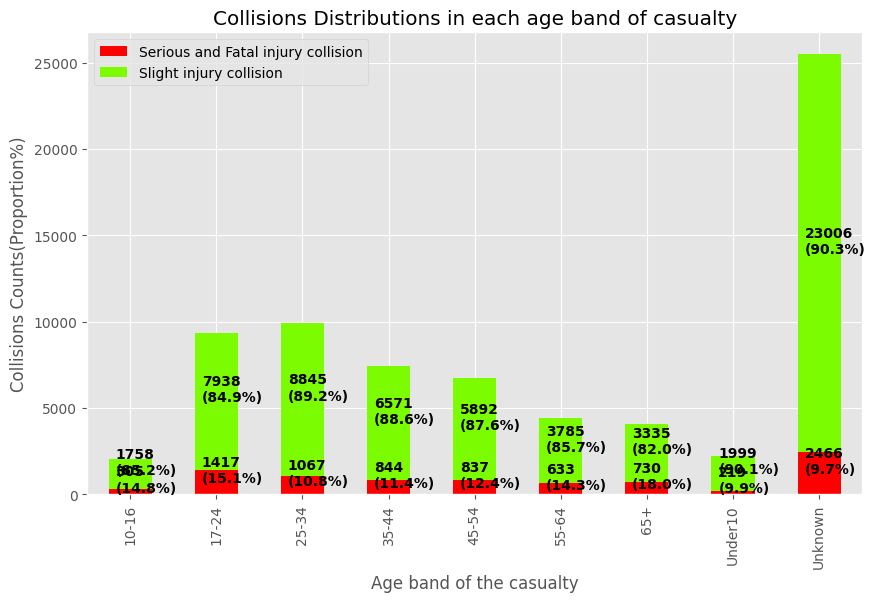

In [ ]:
# agegroup of the casualty

c_age_prop, c_age_num = plot_stacked_texted_bar("c_agegroup", "general_injury_type", "Age band of the casualty",'Collisions Counts(Proportion%)','Collisions Distributions in each age band of casualty')

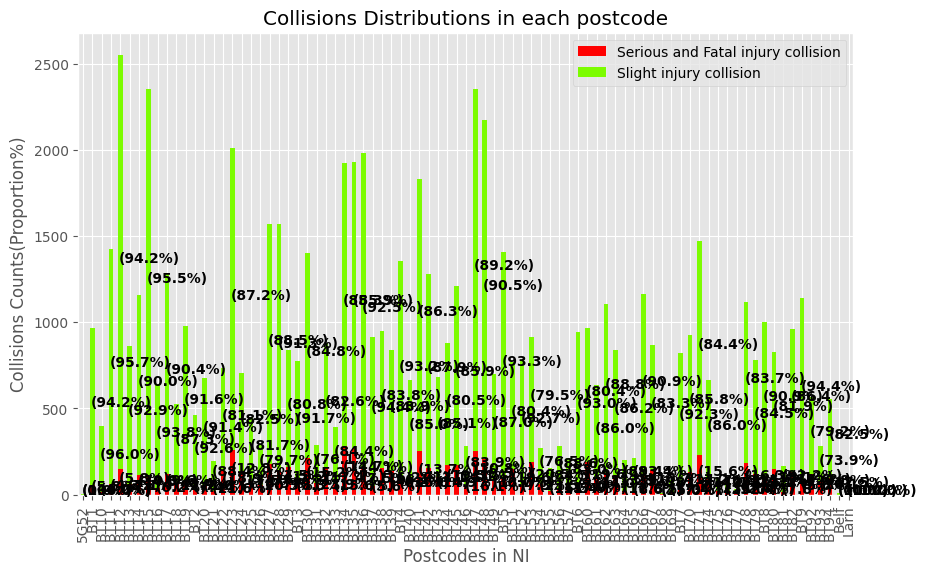

In [ ]:
#postcode

postcode_prop, postcode_num = plot_stacked_texted_bar("postcodes_first4", "general_injury_type", "Postcodes in NI",'Collisions Counts(Proportion%)','Collisions Distributions in each postcode',count_print = False)

In [ ]:
postcode_prop.sort_values(by = "Serious and Fatal injury collision", ascending = False)

general_injury_type,Serious and Fatal injury collision,Slight injury collision
postcodes_first4,,
BT77,0.323529,0.676471
BT93,0.260714,0.739286
BT68,0.250000,0.750000
BT76,0.250000,0.750000
BT31,0.238754,0.761246
...,...,...
BT11,0.042897,0.957103
BT10,0.039900,0.960100
Belf,0.000000,1.000000


In [ ]:
# ni_accidents_removed.loc[ni_accidents_removed["postcodes_first4"] == "BT30", "a_District"].unique()
postcode_prop["postcodes_first4_col"] = postcode_prop.index

In [ ]:
temp = ni_accidents_removed[["postcodes_first4","a_District"]].drop_duplicates()

In [ ]:
df = pd.merge(postcode_prop,temp,how = "right",left_on = "postcodes_first4_col",right_on = "postcodes_first4" )
df.sort_values(by = "Serious and Fatal injury collision", ascending = False)

,Serious and Fatal injury collision,Slight injury collision,postcodes_first4_col,postcodes_first4,a_District
100,0.323529,0.676471,BT77,BT77,Mid Ulster
65,0.260714,0.739286,BT93,BT93,"Fermanagh, Omagh"
132,0.250000,0.750000,BT76,BT76,"Fermanagh, Omagh"
125,0.250000,0.750000,BT68,BT68,Mid Ulster
112,0.250000,0.750000,BT76,BT76,Mid Ulster
...,...,...,...,...,...
8,0.042897,0.957103,BT11,BT11,Belfast City
78,0.039900,0.960100,BT10,BT10,Belfast City
126,0.000000,1.000000,Larn,Larn,"Mid, East Antrim"
99,0.000000,1.000000,Belf,Belf,Belfast City


split city from address

In [ ]:
# ni_accidents_removed["address"]
# ni_accidents_removed["address"][0].split(", ")[1].split(" ")[0]

'Downpatrick'

In [ ]:
ni_accidents_removed["city_splited"] = ni_accidents_removed["address"].str.split(", ").apply(itemgetter(-2)).astype(str).str.split(" ").apply(itemgetter(0)).astype(str)
# ni_accidents_removed["city_splited"] = ni_accidents_removed["split_address"].str.split(" ")[0]

C:\Users\HWX\AppData\Local\Temp\ipykernel_19568\3650168904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni_accidents_removed["city_splited"] = ni_accidents_removed["address"].str.split(", ").apply(itemgetter(-2)).astype(str).str.split(" ").apply(itemgetter(0)).astype(str)


In [ ]:
ni_accidents_removed["city_splited"]

0        Downpatrick
1        Londonderry
3        Londonderry
5        Newtownards
7            Belfast
            ...     
71959        Belfast
71960        Crumlin
71961        Crumlin
71962        Crumlin
71963        Belfast
Name: city_splited, Length: 71647, dtype: object

In [ ]:
ni_accidents_removed["city_splited"].unique()

array(['Downpatrick', 'Londonderry', 'Newtownards', 'Belfast', 'Strabane',
       'Antrim', 'Armagh', 'Enniskillen', 'Ballymena', 'Newry', 'Lisburn',
       'Ballyclare', 'Dungannon', 'Crumlin', 'Coleraine', 'Bangor',
       'Holywood', 'Craigavon', 'Hillsborough', 'Newtownabbey', 'Omagh',
       'Castlederg', 'Ballymoney', 'Cookstown', 'Donaghadee', 'Larne',
       'Limavady', 'Carrickfergus', 'Newcastle', 'Magherafelt',
       'Banbridge', 'Dromore', 'Castlewellan', 'Ballynahinch', 'Portrush',
       'Maghera', 'Bushmills', 'Co.', 'Augher', 'Portstewart', 'M5',
       'Ballycastle', 'Fivemiletown', 'B67', 'Clogher', 'Crossroads',
       'Aughnacloy', '106-120', '3', '148-161', 'Caledon', '96',
       'Labourers', '106a', '392-378', 'BT93', 'Cunningburn', '116', '2',
       'BT36', '5G52+FJ', 'A2', '376-362', 'Drumgallan', 'Millars', '1',
       'HPP8+XR', 'Slievenaman'], dtype=object)

In [ ]:
# ni_accidents_removed[ni_accidents_removed["city_splited"] == "B67"]

In [ ]:
# ni_accidents_removed["address"][1668]

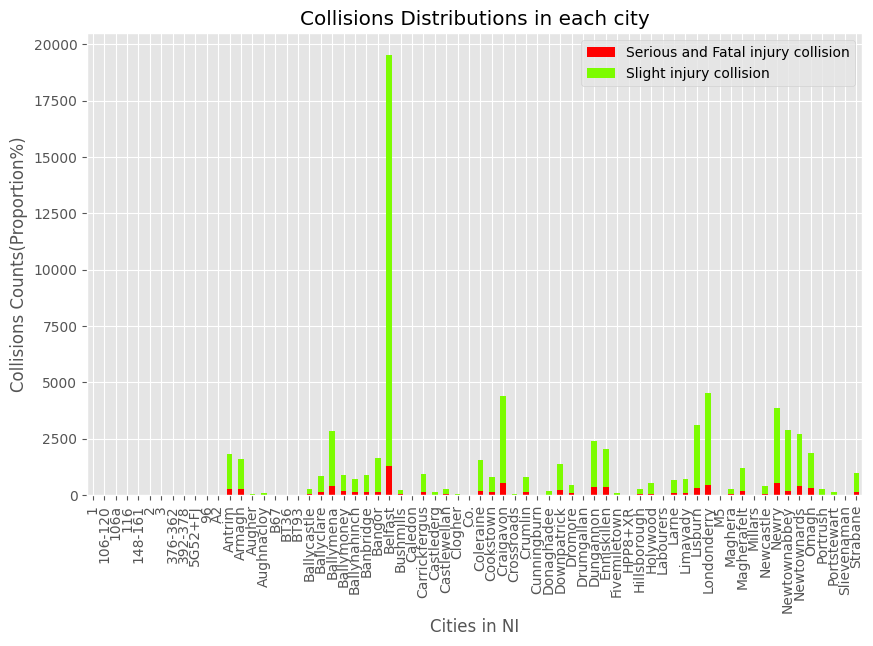

In [ ]:
city_prop, city_num = plot_stacked_texted_bar("city_splited", "general_injury_type", "Cities in NI",'Collisions Counts(Proportion%)','Collisions Distributions in each city',count_print = False,prop_print = False)

In [ ]:
city_prop.sort_values(by = "Serious and Fatal injury collision", ascending = False)

general_injury_type,Serious and Fatal injury collision,Slight injury collision
city_splited,,
3,1.000000,0.000000
392-378,0.833333,0.166667
106a,0.666667,0.333333
148-161,0.500000,0.500000
Augher,0.323529,0.676471
...,...,...
HPP8+XR,0.000000,1.000000
Co.,0.000000,1.000000
Drumgallan,0.000000,1.000000


In [ ]:
city_num.sort_values(by = "Serious and Fatal injury collision", ascending = False)

general_injury_type,Serious and Fatal injury collision,Slight injury collision
city_splited,,
Belfast,1296,18213
Newry,562,3292
Craigavon,527,3854
Londonderry,460,4071
Ballymena,430,2407
...,...,...
96,0,2
Drumgallan,0,1
Crossroads,0,49


In [ ]:
# ni_accidents_removed.plot(x = "lat",y = "lon",kind = "scatter")

In [ ]:
# sns.set(style='ticks')

# sns.relplot(data=ni_accidents_removed, x="lat",y='lon', hue='general_injury_type')
# plt.show()

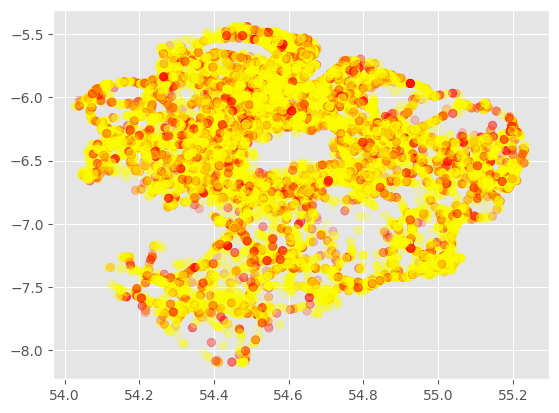

In [ ]:
# Color by severity
colors = {'Slight injury collision':'yellow', 'Serious and Fatal injury collision':'red'}
plt.scatter(ni_accidents_removed["lat"],ni_accidents_removed["lon"],c = ni_accidents_removed["general_injury_type"].map(colors),alpha = 0.2)

In [ ]:
# # density
# from scipy.stats import gaussian_kde

# xy = np.vstack([ni_accidents_removed["lat"],ni_accidents_removed["lon"]])
# z = gaussian_kde(xy)(xy)

# mapping = {'Slight injury collision':'o', 'Serious and Fatal injury collision':'x'}
# for i in range(len(ni_accidents_removed["lat"])):
#     plt.scatter(ni_accidents_removed["lat"],ni_accidents_removed["lon"],c = z, marker=mapping[ni_accidents_removed["general_injury_type"][i]])

# plt.colorbar()

# plt.show()

In [ ]:
# schools, landmark,